![alt text](statements/T9.png "T9")

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [222]:
n = 200
theta_1 = 5
theta_2 = 8

In [223]:
def getZ(n):
    Z = []
    Z.extend([1, 0] for _ in range(n))
    Z.extend([0, 1] for _ in range(2 * n))
    Z.extend([1, 1] for _ in range(n))
    return np.matrix(Z)

In [224]:
def getPred(X, Z):
    return (Z.T * Z) ** -1 @ Z.T @ X # М.Н.К.

In [225]:
Z = getZ(n)
Theta = np.matrix([[theta_1], [theta_2]])

In [226]:
X = Z @ Theta + np.matrix(np.random.normal(0, 1, 4 * n)).T

In [227]:
theta_pred = getPred(X, Z)

In [228]:
theta_pred

matrix([[5.0072625],
        [7.9910734]])

In [239]:
T = np.matrix([8, -5])

In [240]:
B = T @ (Z.T @ Z) ** -1 @ T.T
B

matrix([[0.322]])

In [241]:
F = ((((T @ theta_pred).T ) * (1/B) * ((T @ theta_pred))) * ((4 * n - 2))) / sum(np.array(X - Z @ theta_pred) ** 2)

In [242]:
sum(np.array(X - Z @ theta_pred) ** 2)

array([773.49377556])

In [243]:
print(X.shape)
print(Z.shape)
print((Z @ theta_pred).shape)

(800, 1)
(800, 2)
(800, 1)


In [244]:
F < stats.f.ppf(1 - 0.05, 1, 4 * n - 2)

matrix([[ True]])

In [245]:
F

matrix([[0.03381507]])

In [246]:
stats.f.ppf(1 - 0.05, 1, 4 * n - 2)

3.853138126495274

In [247]:
def F_test(X, Z, T):
    theta_pred = getPred(X, Z)
    B = T @ (Z.T @ Z) ** -1 @ T.T
    sum_sq = sum(np.array(X - Z @ theta_pred) ** 2)
    F = ((T @ theta_pred).T @ (1/B) @ T @ theta_pred * (4 * n - 2)) / sum_sq
    return F < stats.f.ppf(1 - 0.05, 1, 4 * n - 2)

In [248]:
F_test(X, Z, T)

matrix([[ True]])

In [258]:
F_test(X, Z, np.matrix([8, -5]))

matrix([[ True]])

In [282]:
percentage1 = []
percentage2 = []
s1 = 0
s2 = 0
for n in range(1, 1000):
    Z = getZ(n)
    X = Z @ Theta + np.matrix(np.random.normal(0, 1, 4 * n)).T
    T1 = np.matrix([8, -5])
    T2 = np.matrix([3, -2])
    
    s1 += int(F_test(X, Z, T1))
    s2 += int(F_test(X, Z, T2))
    percentage1.append(s1 / n)
    percentage2.append(s2 / n)

In [283]:
percentage1[0:5]

[1.0, 1.0, 1.0, 1.0, 1.0]

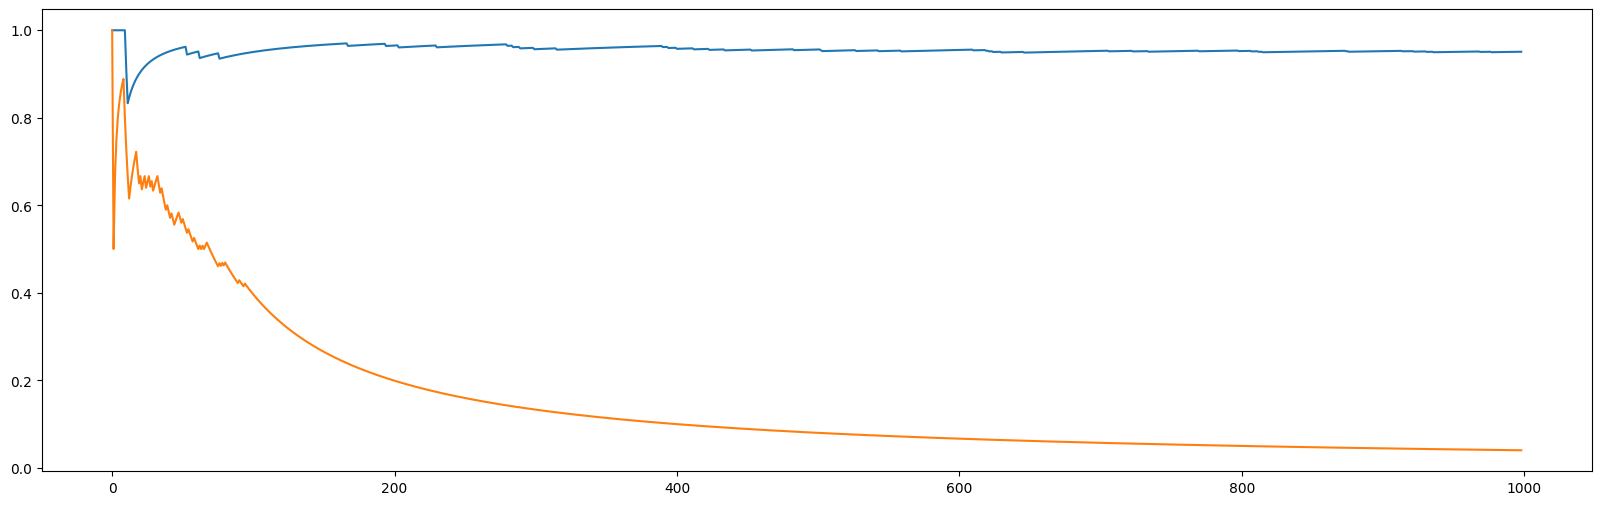

In [290]:
fig = plt.figure(figsize=[20, 6])
plt.plot(percentage1)
plt.plot(percentage2)